In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import re

In [145]:
iris_files = os.listdir('./cross_validation_files_2') #iris

#Expresion regular para datos de entrenamiento
iris_data_validation_exp = re.compile('data_validation_train_\d')
iris_target_validation_exp = re.compile('target_validation_train_\d')
iris_data_validation = []
iris_target_validation = []


#Expresion regular para datos de validacion
iris_data_train_exp = re.compile('data_train_3_\d')
iris_target_train_exp = re.compile('target_train_3_\d')
iris_data_train = []
iris_target_train = []

#Recuperar las archivos de iris
for i in range(len(iris_files)):
    # #ficheros de entrenamiento
    # if iris_data_train_exp.search(iris_files[i]):
    #     iris_data_train.append(iris_files[i])
    # if iris_target_train_exp.search(iris_files[i]):
    #     iris_target_train.append(iris_files[i])
    
    #ficheros de validación
    if iris_data_validation_exp.search(iris_files[i]):
        iris_data_validation.append(iris_files[i])
    if iris_target_validation_exp.search(iris_files[i]):
        iris_target_validation.append(iris_files[i])

# iris_train = [iris_data_train, iris_target_train]
iris_train = [['data_train.csv'], ['target_train.csv']]
iris_validation = [iris_data_validation, iris_target_validation]

print(iris_train)
print(iris_validation)


[['data_train.csv'], ['target_train.csv']]
[['data_validation_train_3_1.csv', 'data_validation_train_3_2.csv', 'data_validation_train_3_3.csv'], ['target_validation_train_3_1.csv', 'target_validation_train_3_2.csv', 'target_validation_train_3_3.csv']]


In [146]:
email_files = os.listdir('./cross_validation_files')

#Expresion regular para datos de entrenamiento
email_data_validation_exp = re.compile('data_validation_train_\d')
email_target_validation_exp = re.compile('target_validation_train_\d')
email_data_validation = []
email_target_validation = []


#Expresion regular para datos de validacion
email_data_train_exp = re.compile('data_train_3_\d')
email_target_train_exp = re.compile('target_train_3_\d')
email_data_train = []
email_target_train = []

#Recuperar las archivos de iris
for i in range(len(email_files)):
    #ficheros de entrenamiento
    # if email_data_train_exp.search(email_files[i]):
    #     email_data_train.append(email_files[i])
    # if email_target_train_exp.search(email_files[i]):
    #     email_target_train.append(email_files[i])
    
    #ficheros de validacion
    if email_data_validation_exp.search(email_files[i]):
        email_data_validation.append(email_files[i])
    if email_target_validation_exp.search(email_files[i]):
        email_target_validation.append(email_files[i])    

#email_train = [email_data_train, email_target_train] #datos para poner a prueba el modelo
email_train = [['data_train.csv'], ['target_train.csv']]
email_validation = [email_data_validation, email_target_validation] #datos para hacer el modelo

print(email_train)
print(email_validation)

[['data_train.csv'], ['target_train.csv']]
[['data_validation_train_3_1.csv', 'data_validation_train_3_2.csv', 'data_validation_train_3_3.csv'], ['target_validation_train_3_1.csv', 'target_validation_train_3_2.csv', 'target_validation_train_3_3.csv']]


In [147]:
def Gaussiana(X, y):

    clf = GaussianNB()
    clf.fit(X, y)

    y_predict = clf.predict(X)
    print ('------------Gaussian NB------------')
    print (y_predict)
    print (clf.predict_proba(X))
    # ~ print (clf.predict_log_proba(X))

    print("El accuary score es:")
    accuaracy = accuracy_score(y, y_predict)
    print (accuracy_score(y, y_predict))
    print("El accuary score normalizado es:")
    print (accuracy_score(y, y_predict, normalize=False))

    target_names = list(map(str, clf.classes_)) #convertir a string

    print(classification_report(y, y_predict, target_names = target_names))
    cm = confusion_matrix(y, y_predict, labels=target_names)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()

    return accuaracy

In [148]:
def Multinomial(X, y):
    print ('\n------------Multinomial NB------------')
    clf = MultinomialNB()
    clf.fit(X, y)

    y_predict = clf.predict(X)
    accuaracy = accuracy_score(y, y_predict)
    print("El accuary score es:")
    print (accuracy_score(y, y_predict))
    print("El accuary score normalizado es:")
    print (accuracy_score(y, y_predict, normalize=False))

    target_names = list(map(str, clf.classes_)) #convertir a string
    
    print(classification_report(y, y_predict, target_names=target_names))
    cm = confusion_matrix(y, y_predict, labels=target_names)
    print (cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()

    return accuaracy


In [149]:
def NaiveBayes (files, path):

    acc_mean_gaussiana = []
    acc_mean_multi = []

    for i in range(len(files[0])):
        x = pd.read_csv(f'./{path}/{files[0][i]}')
        y = pd.read_csv(f'./{path}/{files[1][i]}')
      
        x = x.fillna(0)
        y = y.fillna(0)
        
        #convertir a 1D array
        y = y.to_numpy()
        y = y.ravel()

        acc_mean_gaussiana.append(Gaussiana(x, y))
        acc_mean_multi.append(Multinomial(x, y))

        print(f"El promedio de presición para Naive Bayes Gaussiana es {str(np.mean(acc_mean_gaussiana))}")
        print(f"El promedio de presición para Naive Bayes Multinominal es {str(np.mean(acc_mean_multi))}")

## Predicción para iris

------------Gaussian NB------------
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'I

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

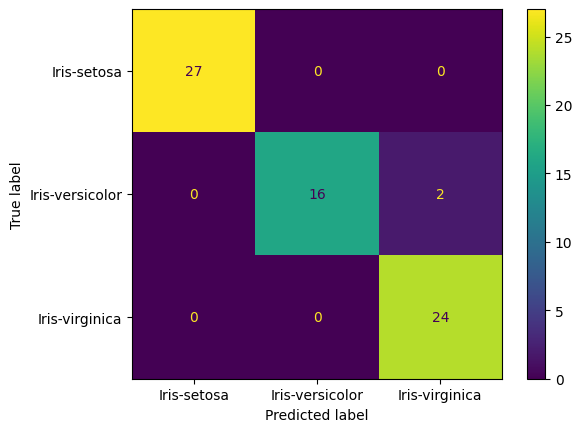

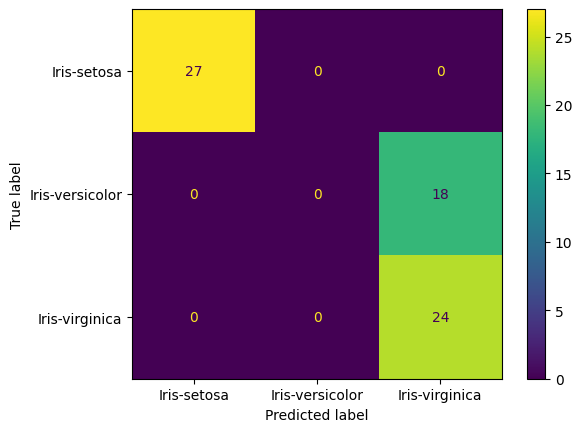

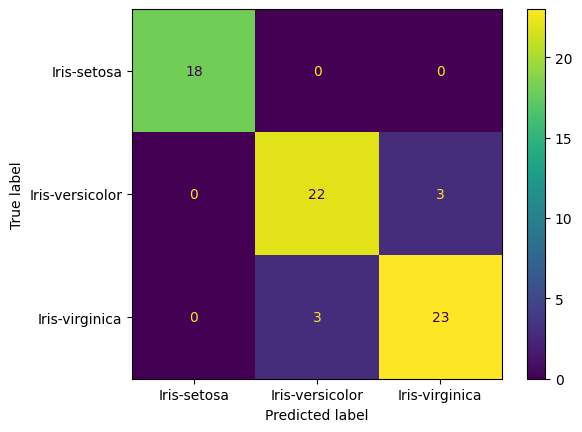

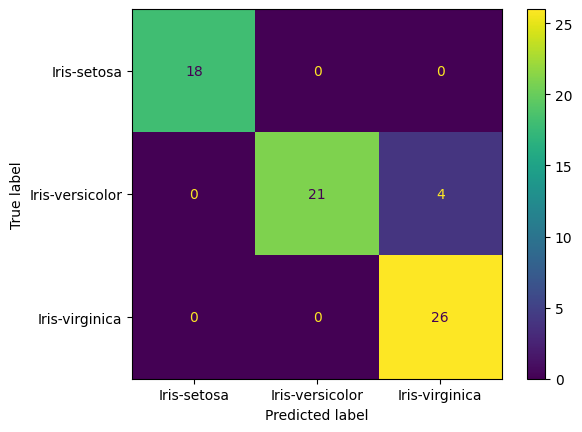

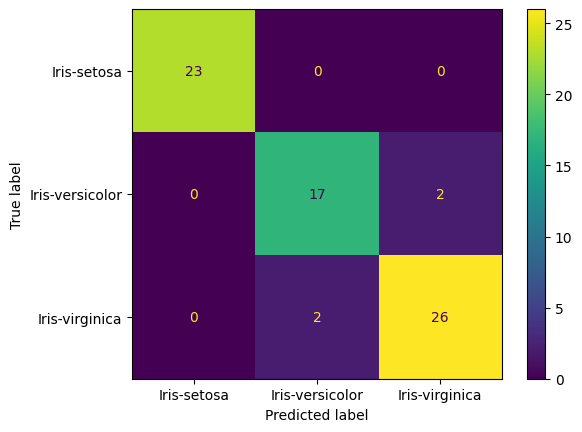

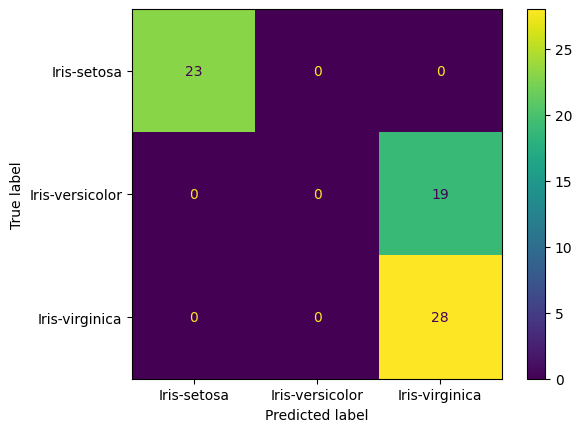

In [150]:
#datos de validación
NaiveBayes(iris_validation, 'cross_validation_files_2')


------------Gaussian NB------------
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor']
[[1.01297860e-127 2.84132750e-007 9.99999716e-001]
 [7.80445569e-040 9.99999558e-001 4.41883023e-007]
 [1.00000000e+000 1.34858962e-022 1.23844678e-034]
 [2.21036410e-147 5.66291290e-006 9.99994337e

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

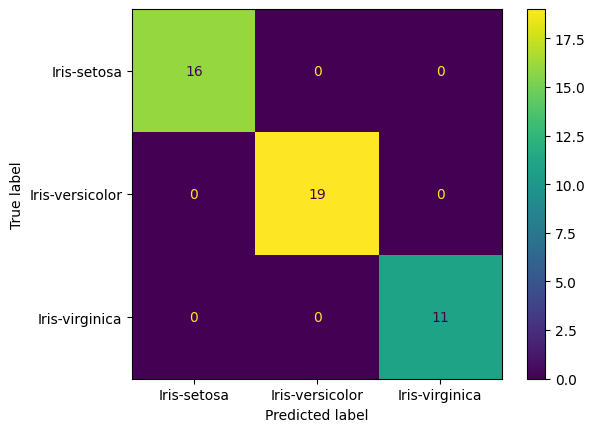

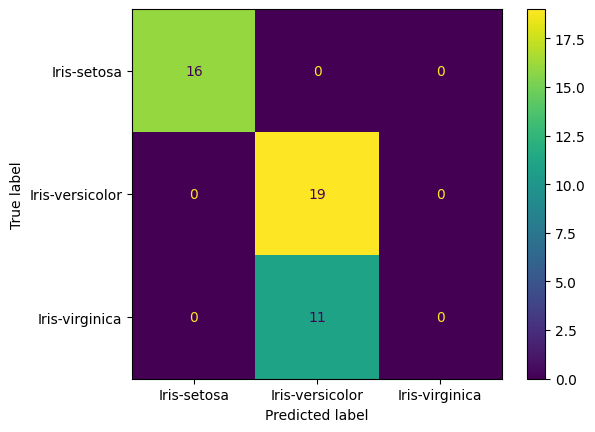

In [151]:
#datos de entrenamiento
NaiveBayes(iris_train, 'cross_validation_files_2')

## Predicción para email

------------Gaussian NB------------
[1 1 0 ... 1 0 1]
[[2.06108813e-279 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]
El accuary score es:
0.9680895151263986
El accuary score normalizado es:
2336
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1732
           1       0.90      1.00      0.95       681

    accuracy                           0.97      2413
   macro avg       0.95      0.98      0.96      2413
weighted avg       0.97      0.97      0.97      2413

[[0 0]
 [0 0]]

------------Multinomial NB------------
El accuary score es:
0.9510982179859097
El accuary score normalizado es:
2295
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1732
           1       0.89      0.94      0.92       681

    accuracy                

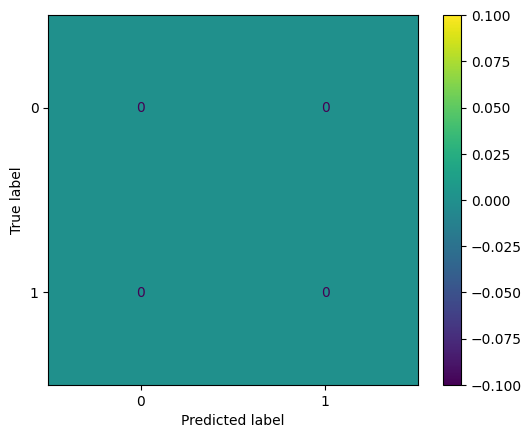

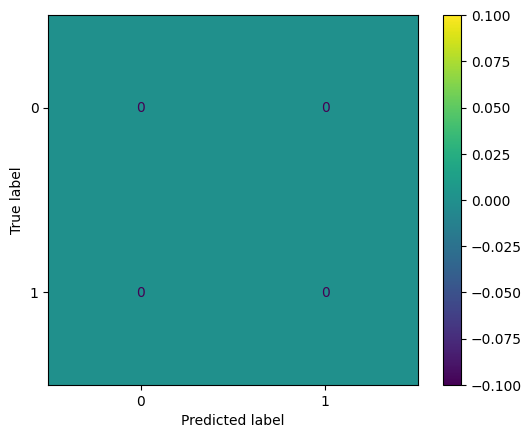

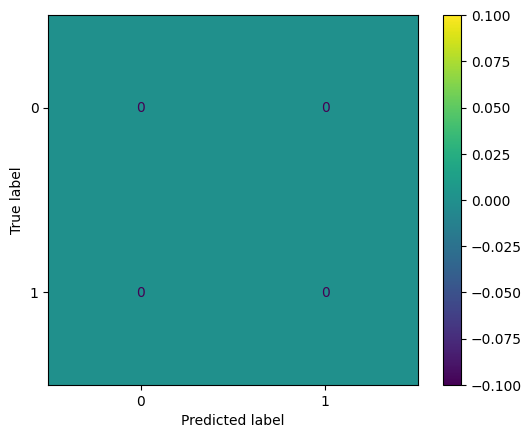

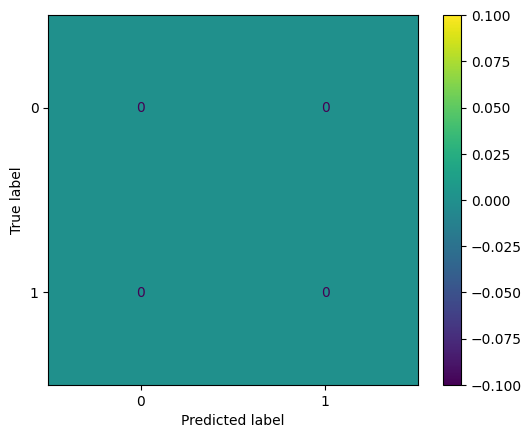

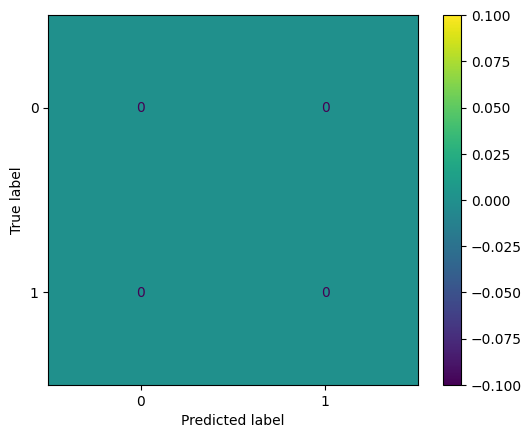

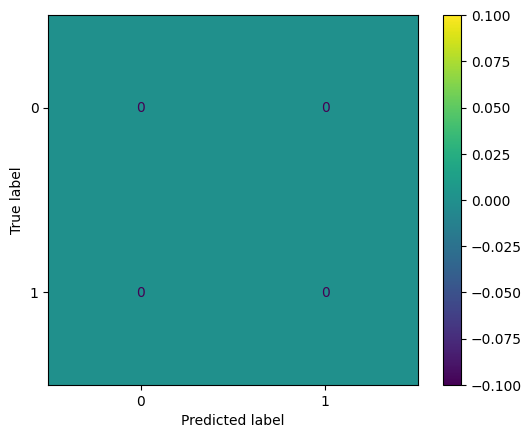

In [152]:
#datos de validación
NaiveBayes(iris_validation, 'cross_validation_files')

------------Gaussian NB------------
[0 0 0 ... 0 1 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
El accuary score es:
0.9729381443298969
El accuary score normalizado es:
1510
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1111
           1       0.91      1.00      0.95       441

    accuracy                           0.97      1552
   macro avg       0.96      0.98      0.97      1552
weighted avg       0.98      0.97      0.97      1552

[[0 0]
 [0 0]]

------------Multinomial NB------------
El accuary score es:
0.9439432989690721
El accuary score normalizado es:
1465
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1111
           1       0.87      0.95      0.91       441

    accuracy                           0.94      1552
   macro avg       0.92      0.94      0.93      1552
weighted avg       0.95      0.94      0.94      1552

[[0 0]
 [0 0]]
El pro

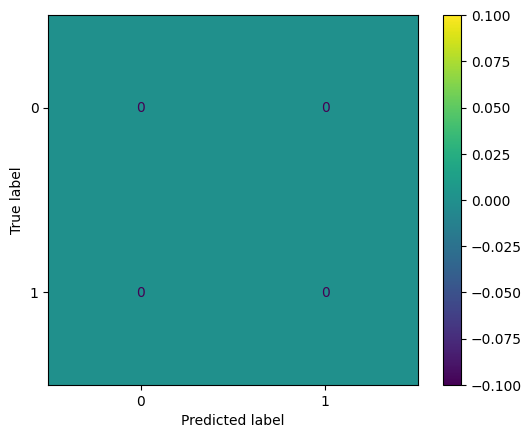

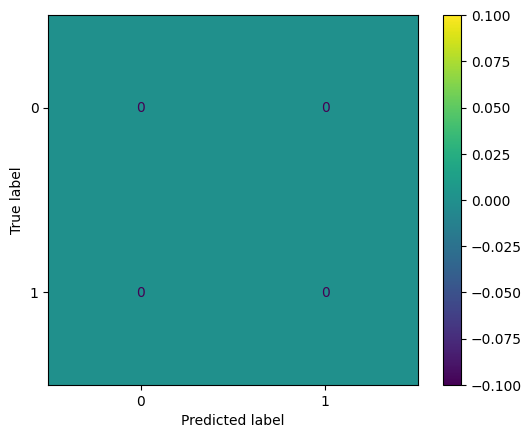

In [156]:
#datos de entrenamiento
NaiveBayes(iris_train, 'cross_validation_files')

In [154]:
plt.show()